**GLOBAL HISTORICAL PRECIPITATION**
- 1 map per model (MRI, Noresm, CESM2, ECearth)

In [2]:
# Library for handling multi-dimensional data (lat, lon, time, etc.)
import xarray as xr
# Library for general handling of arrays
import numpy as np
# Library for handling cartographic projections
import cartopy.crs as ccrs
# Library for listing files in a directory
from os import listdir
# Library for plotting
import matplotlib.pyplot as plt

In [3]:
lat_bot_eas = 20
lat_top_eas = 53
lon_west_eas = 80
lon_east_eas = 133

**MRI-ESM2-0**

In [4]:
ensemble_members = []
for i in range(1, 11):
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/MRI-ESM2-0/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths)['pr']
    ensemble_members.append(pr)
mri_historical_pr = xr.concat(ensemble_members, dim='member')
mri_historical_pr = mri_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in range(1, 11)])

mri_historical_pr_1961_1990 = mri_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
mri_historical_pr_1961_1990.compute()

<xarray.DataArray 'pr' (member: 10, time: 10957, lat: 160, lon: 320)> Size: 22GB
array([[[[2.62210665e-06, 2.47305024e-06, 2.28874069e-06, ...,
          3.29123304e-06, 3.06283800e-06, 2.85102851e-06],
         [3.92443508e-06, 3.27557905e-06, 2.50969242e-06, ...,
          4.28117619e-06, 4.20924653e-06, 4.68289727e-06],
         [3.62157607e-06, 4.12666350e-06, 4.08227925e-06, ...,
          3.51891526e-06, 4.36640767e-06, 3.93613800e-06],
         ...,
         [1.28109514e-06, 1.28534816e-06, 1.51534027e-06, ...,
          1.13409453e-06, 1.29941907e-06, 1.28737861e-06],
         [1.51525774e-06, 1.51984659e-06, 1.52397854e-06, ...,
          1.54521388e-06, 1.53400379e-06, 1.51516781e-06],
         [2.14007355e-06, 2.13787507e-06, 2.16853960e-06, ...,
          2.13625776e-06, 2.14173838e-06, 2.13941325e-06]],

        [[3.66838009e-08, 4.57399807e-08, 6.18515088e-08, ...,
          3.36072752e-08, 3.28896910e-08, 3.39269342e-08],
         [5.88338480e-07, 2.85325001e-07, 3.36780772e-07, ...,
          1.54959139e-06, 7.28067221e-07, 6.36120092e-07],
         [5.34591527e-06, 4.35382753e-06, 4.46331796e-06, ...,
          5.14699877e-06, 5.75723607e-06, 5.70463044e-06],
...
          7.74112650e-08, 8.06172551e-08, 7.99362994e-08],
         [2.08973923e-08, 2.12425810e-08, 2.08920845e-08, ...,
          2.19414726e-08, 2.14656897e-08, 2.19699441e-08],
         [3.60531942e-08, 3.46548674e-08, 3.27263230e-08, ...,
          3.12951194e-08, 3.15516182e-08, 3.19786508e-08]],

        [[1.52863888e-10, 1.32601333e-10, 1.20247562e-10, ...,
          2.47929066e-10, 2.14106427e-10, 1.68113592e-10],
         [1.37791750e-10, 1.47055396e-10, 1.55450569e-10, ...,
          1.13620176e-10, 1.20896210e-10, 1.29109889e-10],
         [4.60365052e-10, 4.90862018e-10, 5.35686273e-10, ...,
          3.88811816e-10, 4.11048778e-10, 4.32762021e-10],
         ...,
         [2.63126594e-06, 2.64789014e-06, 2.63631705e-06, ...,
          2.55142436e-06, 2.54111160e-06, 2.58268096e-06],
         [1.88780325e-06, 1.85007934e-06, 1.81671032e-06, ...,
          1.85421220e-06, 1.85453609e-06, 1.88041327e-06],
         [1.10155895e-06, 1.10451163e-06, 1.08316397e-06, ...,
          1.12822681e-06, 1.14176203e-06, 1.17083016e-06]]]],
      shape=(10, 10957, 160, 320), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 88kB 1961-01-01T12:00:00 ... 1990-12-31T12...
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * member   (member) <U9 360B 'r1i1p1f1' 'r2i1p1f1' ... 'r9i1p1f1' 'r10i1p1f1'
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  PRECIPI
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-05-10T01:34:30Z altered by CMOR: replaced missing va...

In [5]:
mri_historical_pr_1961_1990_mm_day = (mri_historical_pr_1961_1990 * 86400)
mri_historical_pr_1961_1990_mm_day.attrs["units"] = "mm day-1"

In [6]:
mri_historical_pr_1961_1990_mm_day_eas = mri_historical_pr_1961_1990_mm_day.sel(lat=slice(lat_bot_eas, lat_top_eas),lon=slice(lon_west_eas, lon_east_eas))

In [7]:
mri_historical_pr_1961_1990_mm_day_eas_ave = (mri_historical_pr_1961_1990_mm_day_eas.mean('time'))
mri_mean_eas = (mri_historical_pr_1961_1990_mm_day_eas_ave.mean(dim='member'))

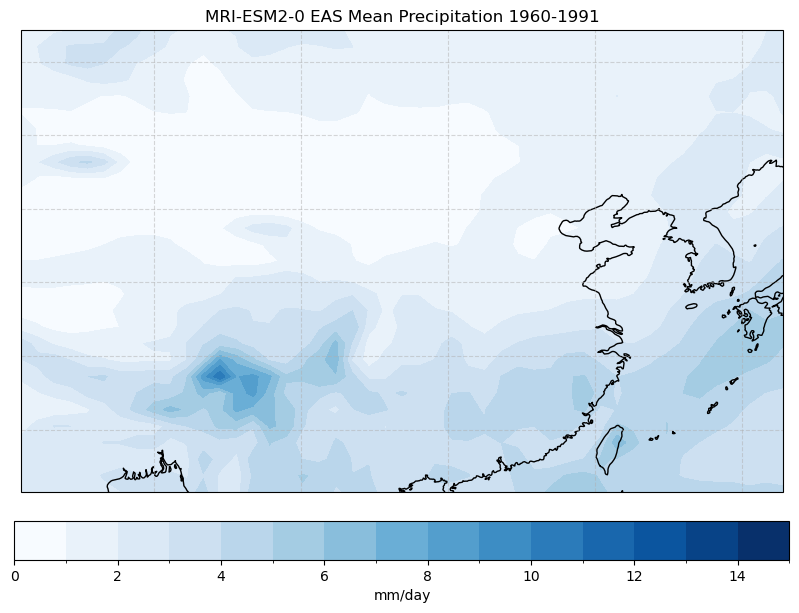

In [8]:
#mri model averaged time 1961-1990, averaged across all members
data = mri_mean_eas


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,15,16),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)


ax.set_title("MRI-ESM2-0 EAS Mean Precipitation 1960-1991")
plt.show()

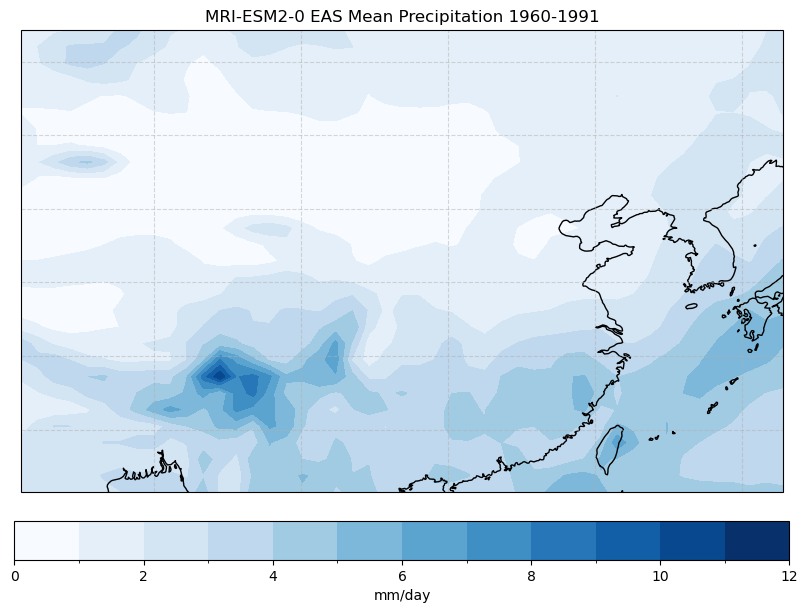

In [9]:
#mri model averaged time 1961-1990, averaged across all members
data = mri_mean_eas


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,12,13),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)


ax.set_title("MRI-ESM2-0 EAS Mean Precipitation 1960-1991")
plt.show()

**NorESM2-LM**

In [10]:
ensemble_members = []
for i in range(1, 4):
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/NorESM2-LM/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths)['pr']
    ensemble_members.append(pr)
noresm_historical_pr = xr.concat(ensemble_members, dim='member')
noresm_historical_pr = noresm_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in range(1, 4)])

noresm_historical_pr_1961_1990 = noresm_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
noresm_historical_pr_1961_1990.compute()

<xarray.DataArray 'pr' (member: 3, time: 10950, lat: 96, lon: 144)> Size: 2GB
array([[[[1.56124301e-07, 1.56123789e-07, 1.56123704e-07, ...,
          1.56124457e-07, 1.56124457e-07, 1.56124401e-07],
         [9.87025894e-15, 6.34499411e-17, 2.08802685e-15, ...,
          3.03601355e-13, 1.11845815e-13, 5.73511236e-14],
         [1.16911011e-13, 1.03200949e-13, 4.67636827e-14, ...,
          3.84816528e-13, 3.52267152e-13, 3.33450823e-13],
         ...,
         [2.34117725e-09, 1.88056282e-09, 1.63309488e-09, ...,
          4.32843699e-08, 1.93489953e-08, 6.53434906e-09],
         [1.10411622e-06, 1.00216948e-06, 8.75855847e-07, ...,
          1.66332916e-06, 1.43624618e-06, 1.27427325e-06],
         [5.13293071e-06, 5.13734039e-06, 5.14172143e-06, ...,
          5.13405075e-06, 5.13301393e-06, 5.13398527e-06]],

        [[1.32122499e-11, 1.32126844e-11, 1.32128735e-11, ...,
          1.32119714e-11, 1.32119931e-11, 1.32120729e-11],
         [1.36602052e-09, 1.18176624e-09, 9.67936509e-10, ...,
          9.56802859e-10, 1.43525225e-09, 1.61978531e-09],
         [1.65103259e-07, 9.65306413e-08, 9.88050530e-08, ...,
          5.70832661e-08, 4.01037887e-08, 1.22910905e-07],
...
          7.90980579e-08, 6.55678889e-08, 5.64312970e-08],
         [1.34859775e-07, 1.29522363e-07, 1.28765279e-07, ...,
          1.57406291e-07, 1.48989102e-07, 1.41546906e-07],
         [7.44046019e-07, 7.45991713e-07, 7.49010383e-07, ...,
          7.45133150e-07, 7.44755823e-07, 7.44545332e-07]],

        [[3.51876042e-06, 3.52077745e-06, 3.52095299e-06, ...,
          3.51827885e-06, 3.51655808e-06, 3.51856738e-06],
         [1.68469683e-06, 1.74214676e-06, 1.80387315e-06, ...,
          1.80897598e-06, 1.68993984e-06, 1.68438714e-06],
         [5.52643030e-07, 8.28178997e-07, 4.81196423e-07, ...,
          3.53437173e-07, 3.91778002e-07, 4.19984815e-07],
         ...,
         [5.18050989e-08, 1.19440898e-07, 2.68779814e-07, ...,
          5.13577447e-08, 4.99210948e-08, 4.77580500e-08],
         [9.10090364e-07, 9.06501043e-07, 9.58011469e-07, ...,
          1.01200703e-06, 1.02581907e-06, 9.78927687e-07],
         [3.69312801e-07, 3.64615602e-07, 3.60418255e-07, ...,
          3.68583471e-07, 3.68788477e-07, 3.68986633e-07]]]],
      shape=(3, 10950, 96, 144), dtype=float32)
Coordinates:
  * time     (time) object 88kB 1961-01-01 12:00:00 ... 1990-12-31 12:00:00
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * member   (member) <U8 96B 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  PRECT
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-15T17:17:16Z altered by CMOR: Converted type from...

In [11]:
noresm_historical_pr_1961_1990_mm_day = (noresm_historical_pr_1961_1990 * 86400)
noresm_historical_pr_1961_1990_mm_day.attrs["units"] = "mm day-1"

noresm_historical_pr_1961_1990_mm_day_eas = noresm_historical_pr_1961_1990_mm_day.sel(lat=slice(lat_bot_eas, lat_top_eas),lon=slice(lon_west_eas, lon_east_eas))


noresm_historical_pr_1961_1990_mm_day_eas_ave = (noresm_historical_pr_1961_1990_mm_day_eas.mean('time'))
noresm_mean_eas = (noresm_historical_pr_1961_1990_mm_day_eas_ave.mean(dim='member'))

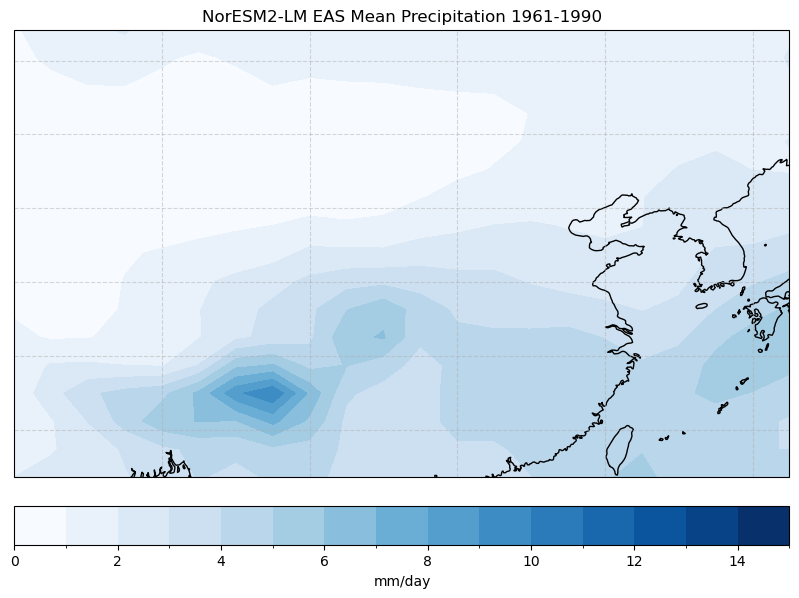

In [12]:
#noresm model averaged time 1961-1990, averaged across all members
data = noresm_mean_eas


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,15,16),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)


ax.set_title("NorESM2-LM EAS Mean Precipitation 1961-1990")
plt.show()

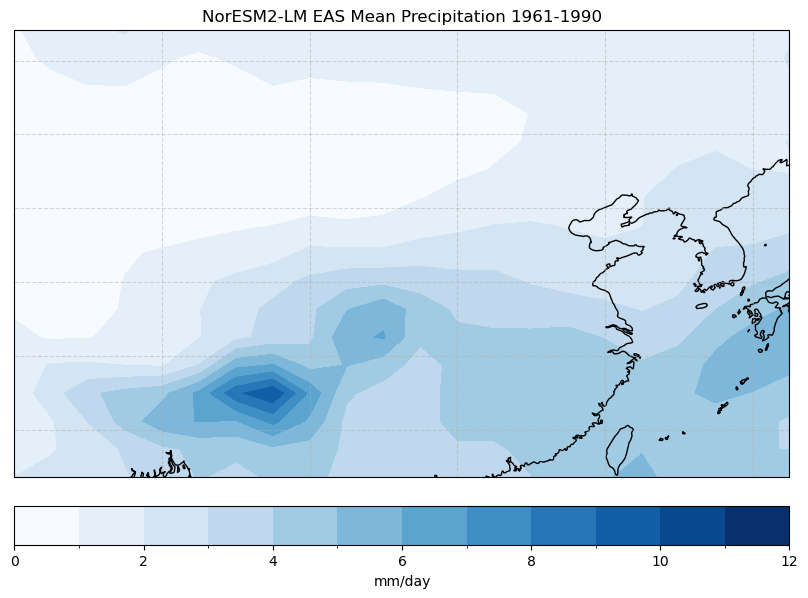

In [13]:
#noresm model averaged time 1961-1990, averaged across all members
data = noresm_mean_eas


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,12,13),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)


ax.set_title("NorESM2-LM EAS Mean Precipitation 1961-1990")
plt.show()

In [14]:
ensemble_members = []
for i in range(1, 11):
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/CESM2/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths)['PRECT']
    ensemble_members.append(pr)
cesm2_historical_pr = xr.concat(ensemble_members, dim='member')
cesm2_historical_pr = cesm2_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in range(1, 11)])

cesm2_historical_pr_1961_1990 = cesm2_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
cesm2_historical_pr_1961_1990.compute()

<xarray.DataArray 'PRECT' (member: 10, time: 10950, lat: 192, lon: 288)> Size: 24GB
array([[[[1.29649125e-09, 1.29649125e-09, 1.29649125e-09, ...,
          1.29649125e-09, 1.29649125e-09, 1.29649125e-09],
         [2.06406625e-09, 2.06842565e-09, 2.07666129e-09, ...,
          2.05546336e-09, 2.05690043e-09, 2.06054618e-09],
         [3.12571968e-09, 3.18481241e-09, 3.23881166e-09, ...,
          2.95339975e-09, 3.00749337e-09, 3.06779757e-09],
         ...,
         [2.62433852e-09, 2.65263833e-09, 2.66448619e-09, ...,
          2.44487186e-09, 2.51874122e-09, 2.57332466e-09],
         [2.08916928e-09, 2.09140039e-09, 2.09170459e-09, ...,
          2.07215822e-09, 2.07734652e-09, 2.08586637e-09],
         [1.78841275e-09, 1.78804627e-09, 1.78793813e-09, ...,
          1.78893755e-09, 1.78875448e-09, 1.78858783e-09]],

        [[2.88890178e-09, 2.88890178e-09, 2.88890178e-09, ...,
          2.88890178e-09, 2.88890178e-09, 2.88890178e-09],
         [3.08353743e-09, 3.11298742e-09, 3.19559668e-09, ...,
          3.06721737e-09, 3.06574699e-09, 3.06904457e-09],
         [3.69239261e-09, 3.68182551e-09, 4.10203915e-09, ...,
          3.74938480e-09, 3.71731623e-09, 3.69026321e-09],
...
          2.69403744e-09, 2.76065037e-09, 2.81551271e-09],
         [1.66587533e-09, 1.67621894e-09, 1.68518655e-09, ...,
          1.64087433e-09, 1.64688907e-09, 1.65618930e-09],
         [1.21276866e-09, 1.21276889e-09, 1.21276911e-09, ...,
          1.21276789e-09, 1.21276822e-09, 1.21276844e-09]],

        [[3.54786311e-10, 3.54786311e-10, 3.54786311e-10, ...,
          3.54786311e-10, 3.54786311e-10, 3.54786311e-10],
         [4.09487472e-10, 4.11415013e-10, 4.11036538e-10, ...,
          3.98721556e-10, 3.99200256e-10, 4.04855593e-10],
         [3.41504491e-10, 3.43440887e-10, 3.41383838e-10, ...,
          3.43397089e-10, 3.38747502e-10, 3.38984202e-10],
         ...,
         [3.36685257e-09, 3.41832052e-09, 3.48223206e-09, ...,
          3.21652371e-09, 3.26334515e-09, 3.31135608e-09],
         [1.61988167e-09, 1.67227499e-09, 1.72911385e-09, ...,
          1.47798918e-09, 1.52779045e-09, 1.57336943e-09],
         [4.99039365e-10, 4.99014274e-10, 4.98992236e-10, ...,
          4.98858177e-10, 4.98945829e-10, 4.98915298e-10]]]],
      shape=(10, 10950, 192, 288), dtype=float32)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 88kB 1961-01-01 00:00:00 ... 1990-12-31 00:00:00
  * member   (member) <U9 360B 'r1i1p1f1' 'r2i1p1f1' ... 'r9i1p1f1' 'r10i1p1f1'
Attributes:
    units:         m/s
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    cell_methods:  time: mean

In [15]:
cesm2_historical_pr_1961_1990_mm_day = (cesm2_historical_pr_1961_1990 * 86400 * 1000)
cesm2_historical_pr_1961_1990_mm_day.attrs["units"] = "mm day-1"

cesm2_historical_pr_1961_1990_mm_day_eas = cesm2_historical_pr_1961_1990_mm_day.sel(lat=slice(lat_bot_eas, lat_top_eas),lon=slice(lon_west_eas, lon_east_eas))

cesm2_historical_pr_1961_1990_mm_day_eas_ave = (cesm2_historical_pr_1961_1990_mm_day_eas.mean('time'))
cesm2_mean_eas = (cesm2_historical_pr_1961_1990_mm_day_eas_ave.mean(dim='member'))

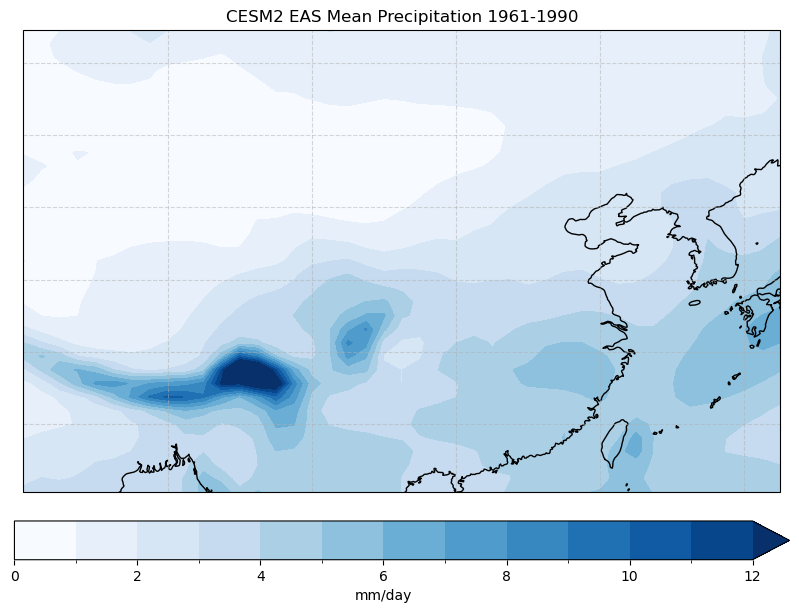

In [16]:
#cesm2 model averaged time 1961-1990, averaged across all members
data = cesm2_mean_eas


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,12,13),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)


ax.set_title("CESM2 EAS Mean Precipitation 1961-1990")
plt.show()

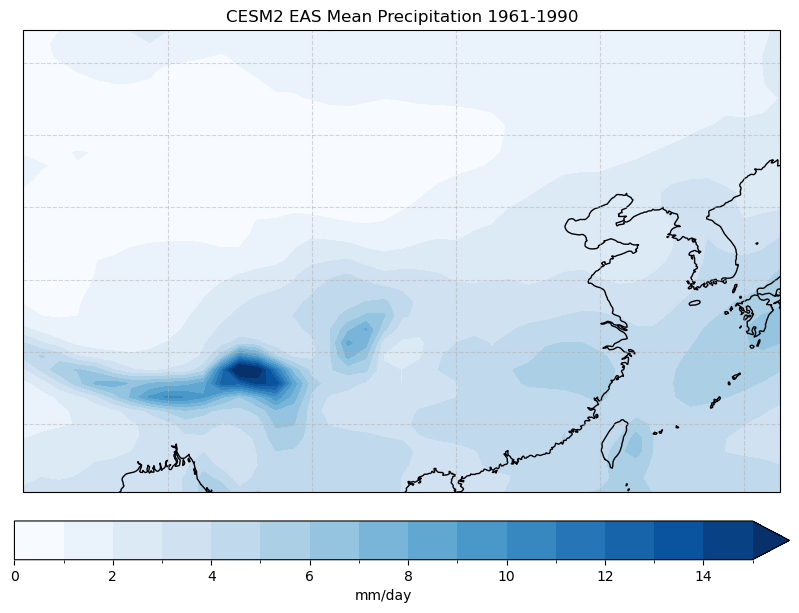

In [17]:
#cesm2 model averaged time 1961-1990, averaged across all members
data = cesm2_mean_eas


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,15,16),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)


ax.set_title("CESM2 EAS Mean Precipitation 1961-1990")
plt.show()

**EC-Earth3-AerChem**

In [18]:
ensemble_members = []
existing_members = [1, 3, 4]
for i in existing_members:
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/EC-Earth3-AerChem/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths)['pr']
    ensemble_members.append(pr)
ec_historical_pr = xr.concat(ensemble_members, dim='member')
ec_historical_pr = ec_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in existing_members])

ec_historical_pr_1961_1990 = ec_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
ec_historical_pr_1961_1990.compute()

<xarray.DataArray 'pr' (member: 3, time: 10957, lat: 512, lon: 512)> Size: 34GB
array([[[[ 1.65568448e-08,  1.63628204e-08,  1.61687943e-08, ...,
           1.65568448e-08,  1.65568448e-08,  1.65568448e-08],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 2.20757936e-08,  2.26147527e-08,  2.31537136e-08, ...,
           1.96504750e-08,  2.04589146e-08,  2.12673541e-08],
         ...,
         [ 1.88196145e-06,  1.89893865e-06,  1.91591585e-06, ...,
           1.86417572e-06,  1.87010426e-06,  1.87603280e-06],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 2.14687088e-06,  2.18509399e-06,  2.22331710e-06, ...,
           2.11951328e-06,  2.12863256e-06,  2.13775184e-06]],

        [[ 1.65568448e-08,  1.67508709e-08,  1.69448970e-08, ...,
           1.65568448e-08,  1.65568448e-08,  1.65568448e-08],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [-1.62797274e-25,  1.07791964e-09,  2.15583928e-09, ...,
          -1.62797274e-25, -1.62797274e-25, -1.62797274e-25],
...
                      nan,             nan,             nan],
         [ 9.38221234e-08,  9.26579702e-08,  9.14938170e-08, ...,
           9.09117404e-08,  9.18818657e-08,  9.28519981e-08],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 2.37314779e-07,  2.40613218e-07,  2.43911643e-07, ...,
           2.38478947e-07,  2.38090877e-07,  2.37702835e-07],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 1.03535476e-05,  1.03221155e-05,  1.02906833e-05, ...,
           1.03436523e-05,  1.03469501e-05,  1.03502489e-05],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]]]],
      shape=(3, 10957, 512, 512), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 88kB 1961-01-01T12:00:00 ... 1990-12-31T12...
  * lat      (lat) float64 4kB -89.46 -89.46 -88.77 -88.77 ... 88.77 89.46 89.46
  * lon      (lon) float64 4kB 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
  * member   (member) <U8 96B 'r1i1p1f1' 'r3i1p1f1' 'r4i1p1f1'
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-05-02T03:56:38Z altered by CMOR: Reordered dimension...

In [19]:
ec_historical_pr_1961_1990_mm_day = (ec_historical_pr_1961_1990 * 86400)
ec_historical_pr_1961_1990_mm_day.attrs["units"] = "mm day-1"

ec_historical_pr_1961_1990_mm_day_eas = ec_historical_pr_1961_1990_mm_day.sel(lat=slice(lat_bot_eas, lat_top_eas),lon=slice(lon_west_eas, lon_east_eas))

ec_historical_pr_1961_1990_mm_day_eas_ave = (ec_historical_pr_1961_1990_mm_day_eas.mean('time'))
ec_mean_eas = (ec_historical_pr_1961_1990_mm_day_eas_ave.mean(dim='member'))

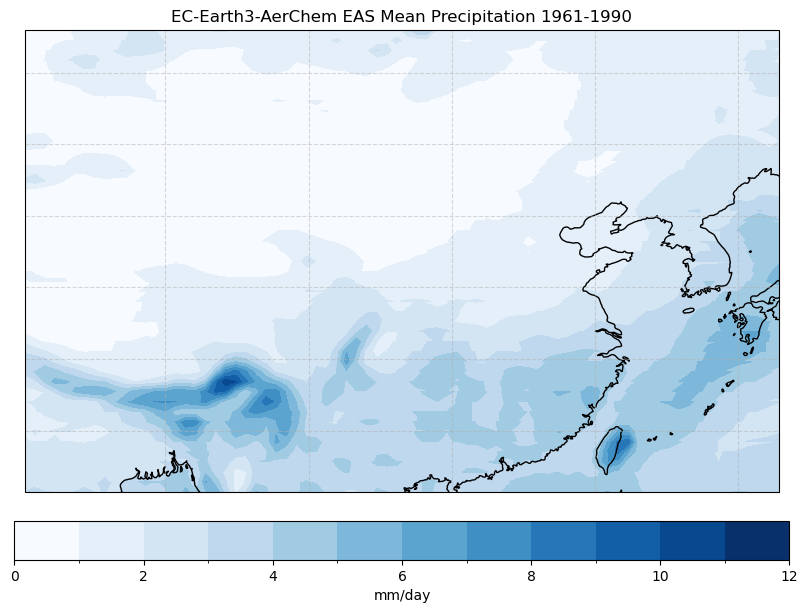

In [20]:
#ec model averaged time 1961-1990, averaged across all members
data = ec_mean_eas


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,12,13),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()
ax.gridlines(draw_labels=False, linestyle='--', alpha=0.5)


ax.set_title("EC-Earth3-AerChem EAS Mean Precipitation 1961-1990")
plt.show()

**MULTIMODEL MEAN EAS**

In [21]:
# Pick one model's grid as reference (e.g., the coarsest one)
target_grid = mri_mean_eas  # or whichever model you want

# Regrid all others to match
mri_regridded = mri_mean_eas
noresm_regridded = noresm_mean_eas.interp(lat=target_grid.lat, lon=target_grid.lon)
cesm2_regridded = cesm2_mean_eas.interp(lat=target_grid.lat, lon=target_grid.lon)
ec_regridded = ec_mean_eas.interp(lat=target_grid.lat, lon=target_grid.lon)

model_means = [mri_regridded, noresm_regridded, cesm2_regridded, ec_regridded]
all_models = xr.concat(model_means, dim='model')
all_models = all_models.assign_coords(model=['MRI-ESM2-0', 'NorESM2-LM', 'CESM2', 'EC-Earth3-AerChem'])
multimodel_mean = all_models.mean(dim='model')

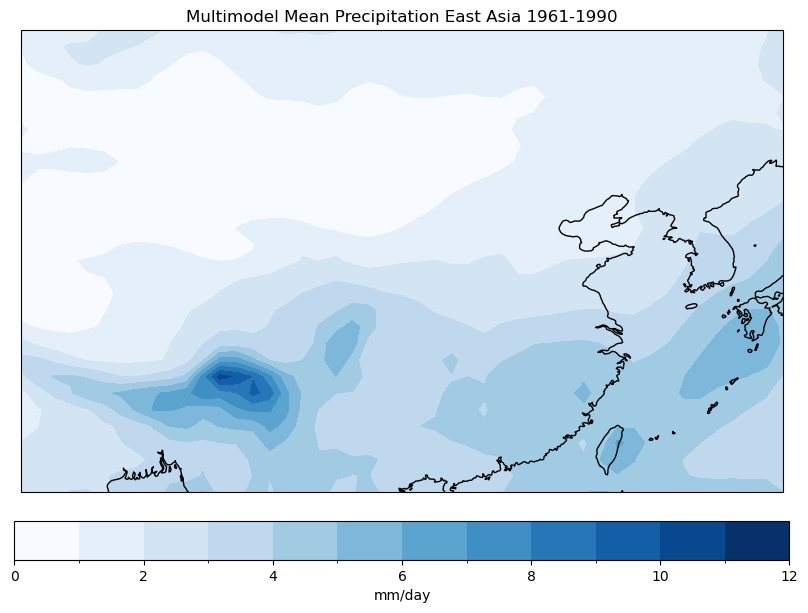

In [22]:
#plotting multimodel mean historical pr 1961-1990 for East Asia
data = multimodel_mean


fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
data.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(0,12,13),
                   cmap='Blues',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})
ax.coastlines()

ax.set_title("Multimodel Mean Precipitation East Asia 1961-1990")
plt.show()


**TIMESERIES**

In [23]:
def weighted_spatial_mean(data):
    # ref: https://docs.xarray.dev/en/latest/examples/area_weighted_temperature.html

    # assign weights depending on latitude
    weights = np.cos(np.deg2rad(data.lat))
    # give the weights a name
    weights.name = "weights"
    # let the data know about the weights
    data_weighted = data.weighted(weights)
    # take the weighted spatial mean
    data_weighted_mean = data_weighted.mean(("lon", "lat"))
    return data_weighted_mean

In [24]:
#pulling out variables for historical pr in mm/day already sliced to EAS domain and getting ensemble means without averaging time
mri_mean_member_ave = mri_historical_pr_1961_1990_mm_day_eas.mean(dim='member')
noresm_mean_member_ave = noresm_historical_pr_1961_1990_mm_day_eas.mean(dim='member')
cesm2_mean_member_ave = cesm2_historical_pr_1961_1990_mm_day_eas.mean(dim='member')
ec_mean_member_ave = ec_historical_pr_1961_1990_mm_day_eas.mean(dim='member')

#averaging over space
mri_space_ave = weighted_spatial_mean(mri_mean_member_ave)
noresm_space_ave = weighted_spatial_mean(noresm_mean_member_ave)
cesm2_space_ave = weighted_spatial_mean(cesm2_mean_member_ave)
ec_space_ave = weighted_spatial_mean(ec_mean_member_ave)

In [25]:
def fix_time(data):
    """Convert cftime to datetime64 using xarray's convert_calendar"""
    if data.time.dtype == 'object':
        # Use xarray's convert_calendar for cftime objects
        data = data.convert_calendar('standard', use_cftime=False)
    return data

mri_space_ave = fix_time(mri_space_ave)
noresm_space_ave = fix_time(noresm_space_ave)
cesm2_space_ave = fix_time(cesm2_space_ave)
ec_space_ave = fix_time(ec_space_ave)

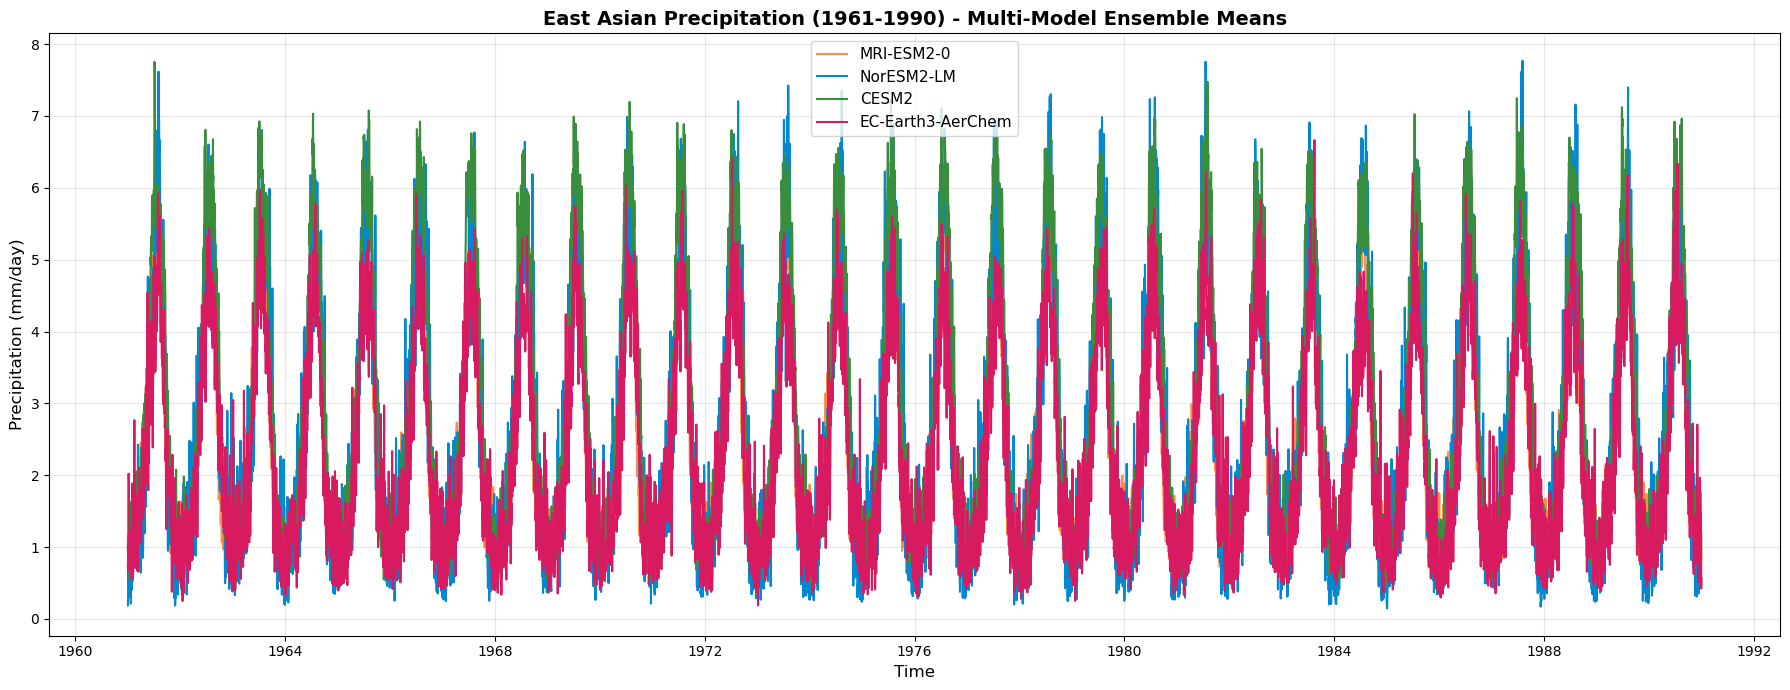

In [29]:
#individual model mean timeseries
fig, ax = plt.subplots(figsize=(18, 7))

mri_space_ave.plot(ax=ax, label='MRI-ESM2-0', color='#FF8C42', linewidth=1.5)
noresm_space_ave.plot(ax=ax, label='NorESM2-LM', color='#0288D1', linewidth=1.5)
cesm2_space_ave.plot(ax=ax, label='CESM2', color='#388E3C', linewidth=1.5)
ec_space_ave.plot(ax=ax, label='EC-Earth3-AerChem', color='#D81B60', linewidth=1.5)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Precipitation (mm/day)', fontsize=12)
ax.set_title('East Asian Precipitation (1961-1990) - Multi-Model Ensemble Means', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [27]:
model_timeseries = [mri_space_ave, noresm_space_ave, cesm2_space_ave, ec_space_ave]
all_model_timeseries = xr.concat(model_timeseries, dim='model')
all_model_timeseries = all_model_timeseries.assign_coords(model=['MRI-ESM2-0', 'NorESM2-LM', 'CESM2', 'EC-Earth3-AerChem'])
multimodel_timeseries = all_model_timeseries.mean(dim='model')

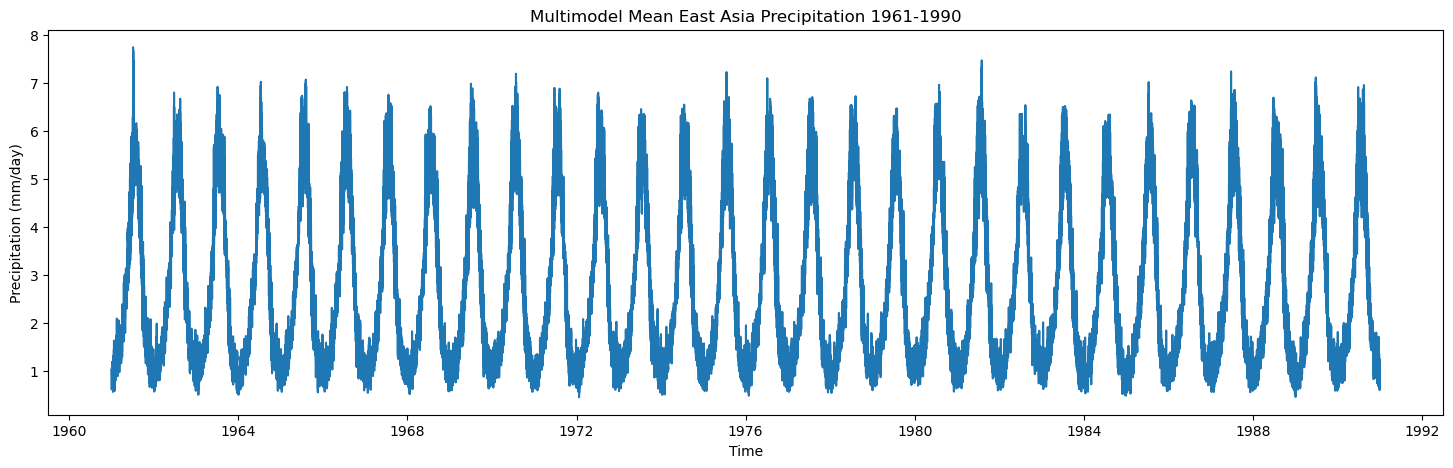

In [28]:
plt.figure(figsize=[18, 5])
multimodel_timeseries.plot()
plt.title('Multimodel Mean East Asia Precipitation 1961-1990')
plt.ylabel('Precipitation (mm/day)')
plt.xlabel('Time')
plt.show()